In [4]:
!pip install -U nltk

  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 749 kB 6.3 MB/s eta 0:00:01


In [5]:
import csv
import pandas as pd
import string
import seaborn as sns

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer

# Used to Pipe line 
from sklearn.feature_extraction.text import TfidfTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# For the Stop Words
from nltk.corpus import stopwords

In [11]:
join_BID_tor = pd.read_csv('join_BID_tor.csv')
join_BID_tor_v2 = pd.read_csv('join_BID_tor_v2.csv')
df_restaurant_tor = pd.read_csv('df_restaurant_tor.csv')
df_review_csv_sept = pd.read_csv('df_review_csv_sept.csv')

In [8]:
df_review_csv_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327066 entries, 0 to 327065
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   327066 non-null  int64 
 1   review_id    327066 non-null  object
 2   user_id      327066 non-null  object
 3   business_id  327066 non-null  object
 4   stars        327066 non-null  int64 
 5   date         327066 non-null  object
 6   text         327066 non-null  object
 7   useful       327066 non-null  int64 
 8   funny        327066 non-null  int64 
 9   cool         327066 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 25.0+ MB


In [9]:
join_BID_tor.describe()

,Unnamed: 0,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,10216.000000,43.677076,-79.390625,3.718837,147.329076,0.995106,3.653061,0.665688,0.214408,0.425635
std,5898.643361,0.046402,0.048237,0.581681,209.044149,0.069788,1.301382,2.928769,1.619727,2.601176
min,0.000000,43.594146,-79.663413,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5108.000000,43.649047,-79.411469,3.500000,31.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,10216.000000,43.656917,-79.392424,4.000000,77.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,15324.000000,43.677909,-79.378927,4.000000,180.000000,1.000000,5.000000,0.000000,0.000000,0.000000
max,20432.000000,43.876501,-79.137178,5.000000,1494.000000,1.000000,5.000000,63.000000,49.000000,62.000000


In [15]:
df_review_csv_sept.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
Year           0
month          0
length         0
dtype: int64

In [10]:
join_BID_tor.isnull().sum()

Unnamed: 0         0
business_id        0
name               0
neighborhood    3156
address            0
city               0
state              0
postal_code       11
latitude           0
longitude          0
stars_x            0
review_count       0
is_open            0
categories         0
review_id          0
user_id            0
stars_y            0
date               0
text               0
useful             0
funny              0
cool               0
dtype: int64

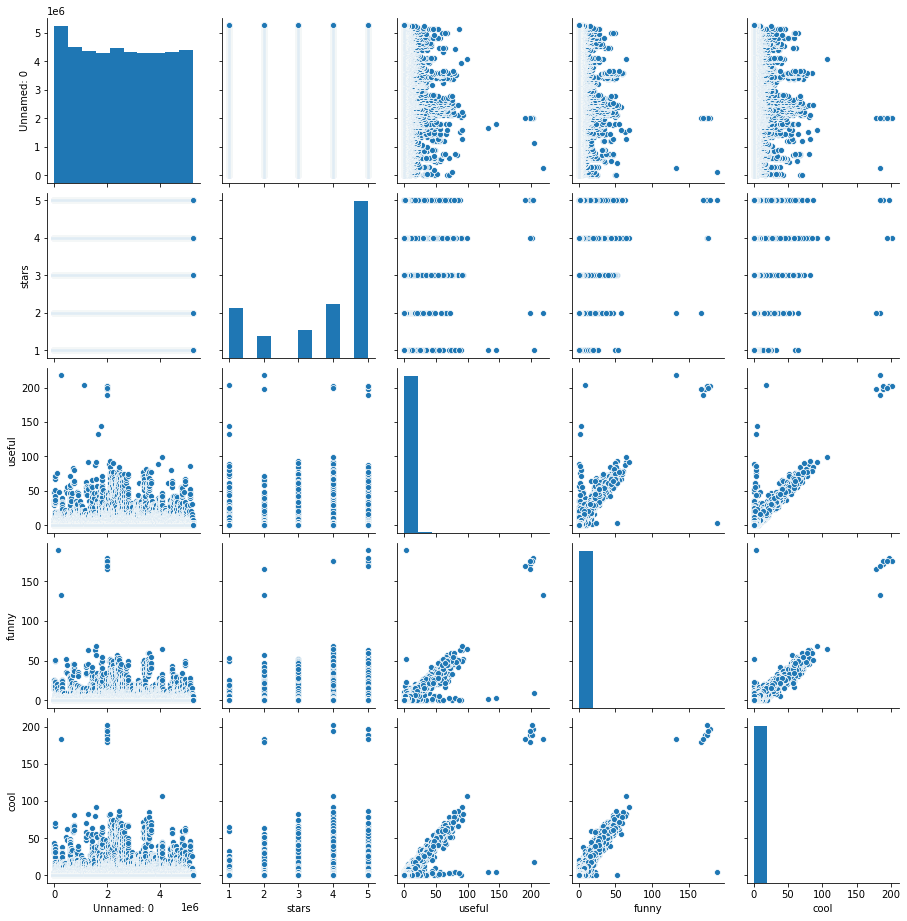

In [19]:
sns.pairplot(df_review_csv_sept)

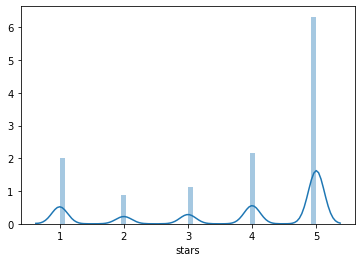

In [7]:
sns.distplot(df_review_csv_sept["stars"])

In [8]:
df_review_csv_sept["stars"].value_counts()

5    165461
4     56871
1     52910
3     29077
2     22747
Name: stars, dtype: int64

In [62]:
most_review = (join_BID_tor_v2.groupby(['city', 'stars_y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='stars_y'))
most_review

,city,stars_y,count
0,Toronto,5,6645
1,Toronto,4,6249
2,Toronto,3,3491
3,Toronto,1,2147
4,Toronto,2,1901


Text(0.5, 1.0, 'Ratings count in Toronto')

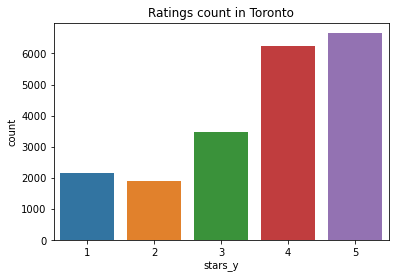

In [65]:
import matplotlib.pyplot as plt

sns.barplot(x=most_review["stars_y"], y=most_review["count"], data=most_review)
plt.title("Ratings count in Toronto")

Text(0.5, 1.0, 'Ratings vs FSA ')

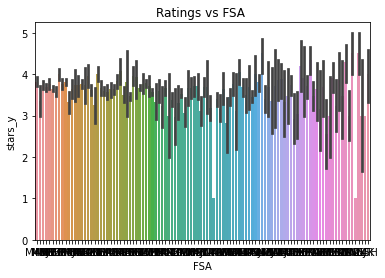

In [51]:
import matplotlib.pyplot as plt

sns.barplot(x=join_BID_tor_v2["FSA"], y=join_BID_tor_v2["stars_y"], data=join_BID_tor_v2)
plt.title("Ratings vs FSA")

In [21]:
join_BID_tor_v2["FSA"].value_counts()

M5V    2222
M5T    1737
M6J    1170
M5G     917
M2N     840
       ... 
M6L       2
V0J       2
L4K       1
L4W       1
M2L       1
Name: FSA, Length: 104, dtype: int64

In [60]:
most_review_FSA = (join_BID_tor_v2.groupby(['FSA', 'stars_y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='stars_y'))
most_review_FSA

,FSA,stars_y,count
0,M5V,5,735
1,M5V,4,669
5,M5V,3,384
15,M5V,2,233
20,M5V,1,201


Text(0.5, 1.0, 'Ratings count in most reviewed FSA (M5V)')

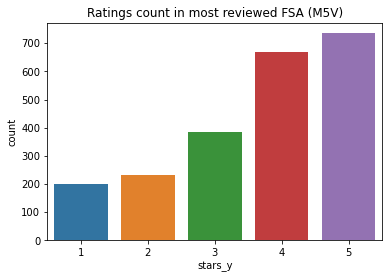

In [64]:
import matplotlib.pyplot as plt

sns.barplot(x=most_review_FSA["stars_y"], y=most_review_FSA["count"], data=most_review_FSA)
plt.title("Ratings count in most reviewed FSA (M5V)")

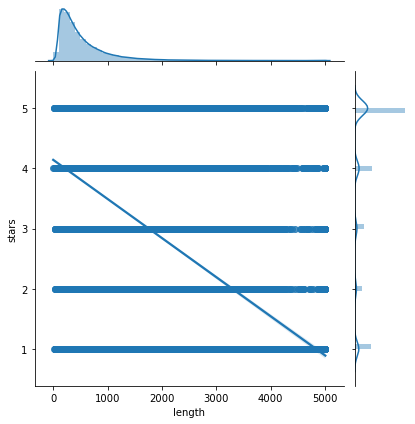

In [15]:
import matplotlib.pyplot as plt

df_review_csv_sept["length"] = df_review_csv_sept["text"].apply(len)
sns.jointplot(x=df_review_csv_sept["length"],
              y=df_review_csv_sept["stars"],
              data=df_review_csv_sept, kind='reg')

The longer the text the lower the star rating

In [14]:
#df_review_csv_sept = df_review_csv_sept[(df_review_csv_sept["stars"]==1) | (df_review_csv_sept["stars"]==5)]
X_Data = df_review_csv_sept["text"]
Y_Data = df_review_csv_sept["stars"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
model = MultinomialNB()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.67      0.75      0.71     15907
           2       0.31      0.23      0.27      6781
           3       0.37      0.30      0.33      8732
           4       0.40      0.63      0.49     16983
           5       0.87      0.72      0.79     49717

    accuracy                           0.64     98120
   macro avg       0.52      0.53      0.52     98120
weighted avg       0.67      0.64      0.65     98120



In [37]:

df_review_csv_sept = df_review_csv_sept[(df_review_csv_sept["stars"]==1) | (df_review_csv_sept["stars"]==5)]
X_Data = df_review_csv_sept["text"]
Y_Data = df_review_csv_sept["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)



pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           1       0.97      0.70      0.81     15873
           5       0.91      0.99      0.95     49639

    accuracy                           0.92     65512
   macro avg       0.94      0.85      0.88     65512
weighted avg       0.93      0.92      0.92     65512



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split